<a href="https://colab.research.google.com/github/AmruhaAhmed/Amazon-Prime-Analysis-using-Python/blob/main/AmazonPrime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()

Saving amazon_prime_titles.csv to amazon_prime_titles.csv


In [3]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['amazon_prime_titles.csv']))
print(df)

     show_id     type                    title         director  \
0         s1    Movie      The Grand Seduction     Don McKellar   
1         s2    Movie     Take Care Good Night     Girish Joshi   
2         s3    Movie     Secrets of Deception      Josh Webber   
3         s4    Movie       Pink: Staying True   Sonia Anderson   
4         s5    Movie            Monster Maker     Giles Foster   
...      ...      ...                      ...              ...   
9663   s9664    Movie      Pride Of The Bowery  Joseph H. Lewis   
9664   s9665  TV Show            Planet Patrol              NaN   
9665   s9666    Movie                  Outpost     Steve Barker   
9666   s9667  TV Show  Maradona: Blessed Dream              NaN   
9667   s9668    Movie              Harry Brown    Daniel Barber   

                                                   cast         country  \
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1      Mahesh Manjrekar, Abhay Mahajan, Sachi

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


Dealing with Null values in the dataset


In [5]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2083
cast,1233
country,8996
date_added,9513
release_year,0
rating,337
duration,0


In [6]:
df['director'].value_counts()

,count
director,
Mark Knight,113
Cannis Holder,61
Moonbug Entertainment,37
Jay Chapman,34
Arthur van Merwijk,30
...,...
Karyn Kusama,1
K. Subash,1
Robert Cuffley,1


replacing NULL values in director column with Mark Knight,since it occurs the most amount of times in the dataset

In [7]:
df['director'].fillna(value='Mark Knight',inplace=True)

In [8]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,1233
country,8996
date_added,9513
release_year,0
rating,337
duration,0


In [9]:
df['cast'].value_counts()

,count
cast,
Maggie Binkley,56
1,34
Anne-Marie Newland,24
Cassandra Peterson,21
"Grace Tamayo, Erin Webbs",17
...,...
"Robert Redford, Jane Fonda, Charles Boyer, Mildred Natwick, Herb Edelman",1
"Paul Reubens, Stephanie Hodge, Valeria Golino, Kris Kristofferson, Penelope Ann Miller, Susan Tyrrell, Albert Henderson, Terrence Mann, Jack Murdock, David Byrd, Mary Jackson",1
"Lorena Segura York, Garrett Westton, Bill Engvall, Bethany Peterson, Dariush A. Moslemi",1


replacing NULL values in cast column with Maggie Binkley since it occurs the most amount of times in cast column.

In [10]:
df['cast'].fillna(value="Maggie Binkley",inplace=True)

In [11]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,8996
date_added,9513
release_year,0
rating,337
duration,0


In [12]:
df['cast']

,cast
0,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent"
1,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar"
2,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R..."
3,"Interviews with: Pink, Adele, Beyoncé, Britney..."
4,"Harry Dean Stanton, Kieran O'Brien, George Cos..."
...,...
9663,"Leo Gorcey, Bobby Jordan"
9664,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M..."
9665,"Ray Stevenson, Julian Wadham, Richard Brake, M..."
9666,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit..."


In [13]:
df['country'].value_counts()

,count
country,
United States,253
India,229
United Kingdom,28
Canada,16
"United Kingdom, United States",12
...,...
"United States, Germany, Brazil, Italy",1
South Africa,1
"Australia, United States, Germany",1


replacing NULL values in country column with United States as it occurs the most amount of times in the dataset


In [14]:
df['country'].fillna(value='United States',inplace=True)

In [15]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,9513
release_year,0
rating,337
duration,0


In [16]:
df['rating'].value_counts()

,count
rating,
13+,2117
16+,1547
ALL,1268
18+,1243
R,1010
PG-13,393
7+,385
PG,253
NR,223


Filling NULL values of rating column with '13+' as it occurs the most amount of times in the dataset

In [17]:
df['rating'].fillna(value="13+",inplace=True)

In [18]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [19]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,9513
release_year,0
rating,0
duration,0


In [20]:
df=df.drop(['date_added'],axis=1)
df=df.drop(['show_id'],axis=1)

In [21]:
df['rating'].value_counts()

,count
rating,
13+,2454
16+,1547
ALL,1268
18+,1243
R,1010
PG-13,393
7+,385
PG,253
NR,223


creating a function rating_cleaner to group similar rating values together

In [22]:
def rating_cleaner(text):
  if(text=="13+" or text=="PG-13"):
    return ("above13")
  if(text=="16+" or text=="16" or text=="AGES_16_"):
    return("above16")
  if(text=="18+" or text=="AGES_18_" or text=="R" or text=="NC-17" or text=="TV-MA"):
    return("above18")
  if(text=="7+" or text=="TV-Y7"):
    return("above7")
  if(text=="ALL_AGES" or text=="NOT_RATE" or text=="UNRATED" or text=="TV-G" or text=="G" or text=="TV-NR"):
    return("forall")
  if(text=="TV-PG" or text=="PG"):
    return("parentalguidance")

In [23]:
df['rating']=df['rating'].apply(rating_cleaner)

creating remove_punctuation function to remove the punctuation from various columns

In [24]:
def remove_punctuation(text):
 punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
 for ele in text:
  if(ele in punc):
    text=text.replace(ele," ")
 return(text)


In [25]:
df['cast']=df['cast'].apply(remove_punctuation)

In [26]:
df['title']=df['title'].apply(remove_punctuation)

In [27]:
df['listed_in']=df["listed_in"].apply(remove_punctuation)

In [28]:
df['description']=df['description'].apply(remove_punctuation)

In [29]:
df['country']=df['country'].apply(remove_punctuation)

In [30]:
df['rating'].unique()

array(['above13', None, 'above18', 'above7', 'above16',
       'parentalguidance', 'forall'], dtype=object)

In [31]:
df.tail()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
9663,Movie,Pride Of The Bowery,Joseph H. Lewis,Leo Gorcey Bobby Jordan,United States,1940,above7,60 min,Comedy,New York City street principles get an East Si...
9664,TV Show,Planet Patrol,Mark Knight,DICK VOSBURGH RONNIE STEVENS LIBBY MORRIS M...,United States,2018,above13,4 Seasons,TV Shows,This is Earth 2100AD and these are the adve...
9665,Movie,Outpost,Steve Barker,Ray Stevenson Julian Wadham Richard Brake M...,United States,2008,above18,90 min,Action,In war torn Eastern Europe a world weary grou...
9666,TV Show,Maradona Blessed Dream,Mark Knight,Esteban Recagno Ezequiel Stremiz Luciano Vit...,United States,2021,above18,1 Season,Drama Sports,The series tells the story of Diego Maradona ...
9667,Movie,Harry Brown,Daniel Barber,Michael Caine Emily Mortimer Joseph Gilgun ...,United States,2010,above18,103 min,Action Drama Suspense,Harry Brown starring two time Academy Award w...


creating df_movies dataset containing only those titles which are movies

In [32]:
df_movies=df[df['type']=="Movie"]

In [33]:
df_movies

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
0,Movie,The Grand Seduction,Don McKellar,Brendan Gleeson Taylor Kitsch Gordon Pinsent,Canada,2014,above13,113 min,Comedy Drama,A small fishing village must procure a local d...
1,Movie,Take Care Good Night,Girish Joshi,Mahesh Manjrekar Abhay Mahajan Sachin Khedekar,India,2018,above13,110 min,Drama International,A Metro Family decides to fight a Cyber Crimin...
2,Movie,Secrets of Deception,Josh Webber,Tom Sizemore Lorenzo Lamas Robert LaSardo R...,United States,2017,above13,74 min,Action Drama Suspense,After a man discovers his wife is cheating on ...
3,Movie,Pink Staying True,Sonia Anderson,Interviews with Pink Adele Beyoncé Britney...,United States,2014,above13,69 min,Documentary,Pink breaks the mold once again bringing her ...
4,Movie,Monster Maker,Giles Foster,Harry Dean Stanton Kieran O Brien George Cos...,United Kingdom,1989,above13,45 min,Drama Fantasy,Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...
9660,Movie,The Man in the Hat,"John-Paul Davidson, Stephen Warbeck",Ciaran Hinds Stephen Dillane Maïwenn,United States,2021,above13,96 min,Comedy,The Man in the Hat journeys through France in ...
9662,Movie,River,Emily Skye,Mary Cameron Rogers Alexandra Rose Rob Marsh...,United States,2021,above16,93 min,Drama Science Fiction Suspense,River is a grounded Sci Fi mystery Thriller t...
9663,Movie,Pride Of The Bowery,Joseph H. Lewis,Leo Gorcey Bobby Jordan,United States,1940,above7,60 min,Comedy,New York City street principles get an East Si...
9665,Movie,Outpost,Steve Barker,Ray Stevenson Julian Wadham Richard Brake M...,United States,2008,above18,90 min,Action,In war torn Eastern Europe a world weary grou...


Creating df_tvshows to store only those titles which are tv_shows

In [34]:
df_tvshows=df[df['type']=="TV Show"]

In [35]:
df_tvshows

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
17,TV Show,Zoo Babies,Mark Knight,Narrator Gillian Barlett,United States,2008,None,1 Season,Kids Special Interest,A heart warming and inspiring series that welc...
18,TV Show,Zoë Coombs Marr Bossy Bottom,Mark Knight,Zoë Coombs Marr,United States,2020,above18,1 Season,Comedy Talk Show and Variety,Zoë Coombs Marr has been on hiatus Sort of F...
20,TV Show,Zoboomafoo,Mark Knight,Maggie Binkley,United States,2001,None,1 Season,Kids,Chris and Martin Kratt bring their enthusiasm ...
21,TV Show,Zo Zo Zombie Mini Series,Mark Knight,Alex Cazares Ben Diskin Cristina Vee Erika ...,United States,2020,above7,1 Season,Action Anime Comedy,Zo Zo Zombie is our undead hero who with his ...
23,TV Show,ZeroZeroZero,Mark Knight,ANDREA RISEBOROUGH HAROLD TORRES CLAUDIA PIN...,Italy,2020,above18,1 Season,TV Shows,ZeroZeroZero series follows the journey of a c...
...,...,...,...,...,...,...,...,...,...,...
9651,TV Show,Glass Room,Mark Knight,Elizaveta Maiskaya Vsevolod Boldin Alexander...,United States,2019,above16,1 Season,Drama,Geography teacher Elena lives with her husband...
9655,TV Show,DaFUNdamentals Series,Mark Knight,Emile Crawford Randall Crawford Jon Ward,United States,2021,None,1 Season,Animation Kids,Learn daFundamentals through song and fun ch...
9661,TV Show,Terrahawks,Mark Knight,DENISE BRYER WINDSOR DAVIES JEREMY HITCHEN ...,United States,1983,None,3 Seasons,TV Shows,This thrilling action packed series saw Gerry...
9664,TV Show,Planet Patrol,Mark Knight,DICK VOSBURGH RONNIE STEVENS LIBBY MORRIS M...,United States,2018,above13,4 Seasons,TV Shows,This is Earth 2100AD and these are the adve...


Analyzing the Dataset


In [36]:
import matplotlib.pyplot as plt

In [37]:
import seaborn as sns

In [38]:
df['director'].value_counts().head(10)

,count
director,
Mark Knight,2196
Cannis Holder,61
Moonbug Entertainment,37
Jay Chapman,34
Arthur van Merwijk,30
Manny Rodriguez,22
John English,20
1,16
Brian Volk-Weiss,15


In [39]:
x=['Mark Knight','Cannis Holder','Moonbug Entertainment','Jay Chapman','Arthur van Merwijk','Manny Rodriguez','John English','Brian Volk-Weiss','Baeble Music','Joseph Kane ']

In [40]:
y=[2211,61,37,34,30,22,20,15,14,13]

<ipython-input-133-5f39783798ac>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  figure1=sns.barplot(x=x,y=y,palette="YlOrBr")
<ipython-input-133-5f39783798ac>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure1.set_xticklabels(labels=x,rotation=90)


Text(0, 0.5, 'Count of Works')

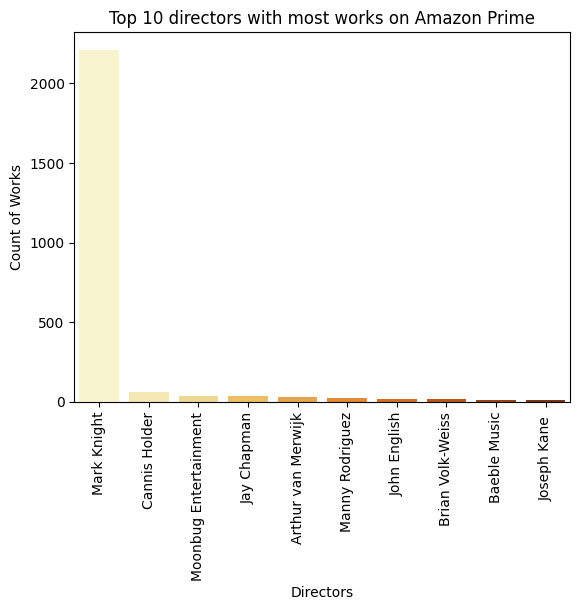

In [133]:
figure1=sns.barplot(x=x,y=y,palette="YlOrBr")
figure1.set_xticklabels(labels=x,rotation=90)
plt.title("Top 10 directors with most works on Amazon Prime")
plt.xlabel("Directors")
plt.ylabel("Count of Works")

Insight Gathered: Mark Knight is the director with most amount of works listed on Prime

In [42]:
df['type'].value_counts()

,count
type,
Movie,7814
TV Show,1854


Text(0.5, 1.0, 'Type of Content available on Amazon Prime Video')

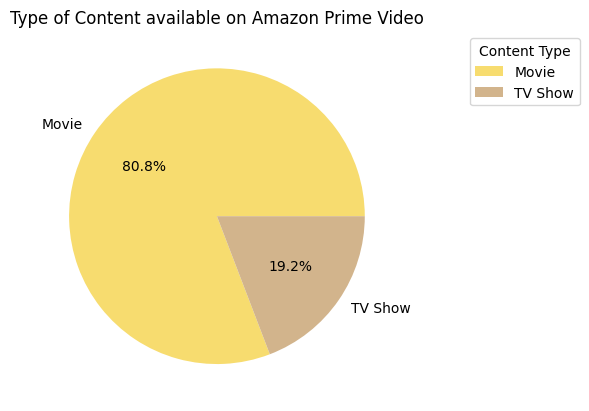

In [135]:
palette_color=['#F7DC6F','#D2B48C']
keys=["Movie","TV Show"]
data=[7814,1854]
plt.pie(data,labels=keys,colors=palette_color,autopct='%1.1f%%')
legend_labels = keys
plt.legend( legend_labels, loc='upper right', bbox_to_anchor=(1.5, 1), title="Content Type")
plt.title("Type of Content available on Amazon Prime Video")

Insight Gathered:Movies constitute a major part of the content available on Amazon Prime

In [44]:
df_tvshows.columns


Index(['type', 'title', 'director', 'cast', 'country', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Text(0.5, 1.0, 'Histogram of Releases of Tv Shows/Movies Available on Amazon Prime')

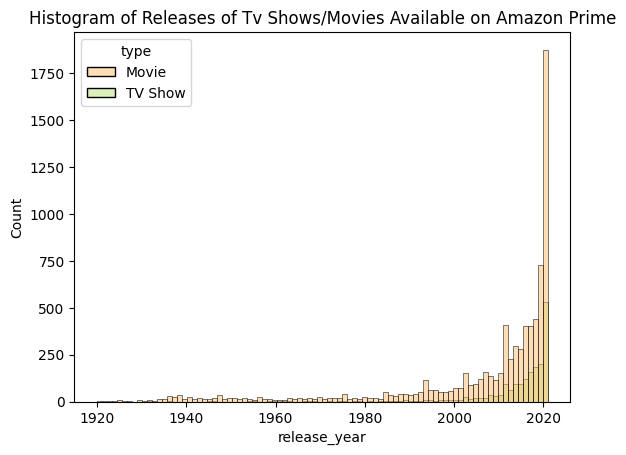

In [45]:
sns.histplot(x='release_year',hue='type',data=df,palette="RdYlGn")
plt.title("Histogram of Releases of Tv Shows/Movies Available on Amazon Prime")

Insight Gathered: Movies and TV shows count has seen an exponential rise in the recent years. Movies and TV shows  released in 2020-2021 constitute a major part of the content on Amazon Prime

In [46]:
df['listed_in'].value_counts().head(5)

,count
listed_in,
Drama,986
Comedy,536
Drama Suspense,399
Comedy Drama,377
Animation Kids,356


Text(0.5, 1.0, 'Most Prominent Genres on Amazon Prime ')

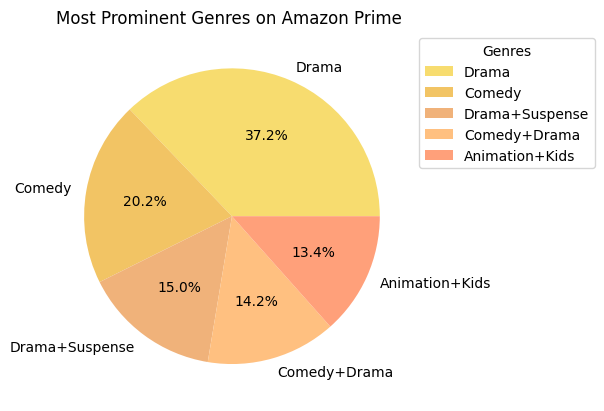

In [136]:
palette_color=palette_color = ['#F7DC6F', '#F2C464', '#F0B27A', '#FFC080', '#FFA07A']
keys=['Drama','Comedy','Drama+Suspense','Comedy+Drama','Animation+Kids']
data=[986,536,399,377,356]
plt.pie(data,labels=keys,colors=palette_color,autopct='%1.1f%%')
legend_labels = keys
plt.legend( legend_labels, loc='upper right', bbox_to_anchor=(1.5, 1), title="Genres")
plt.title("Most Prominent Genres on Amazon Prime ")

Insight Gathered: Among the TV shows and movies avaialble on Amazon Prime,Drama followed by Comedy are the most popular genres

In [48]:
df_movies['listed_in'].value_counts().head(10)

,count
listed_in,
Drama,870
Comedy,442
Drama Suspense,349
Comedy Drama,338
Documentary,300
Action Drama,277
Horror,253
Kids,226
Action,216


Text(0.5, 1.0, 'Most Prominent Genres in Movies')

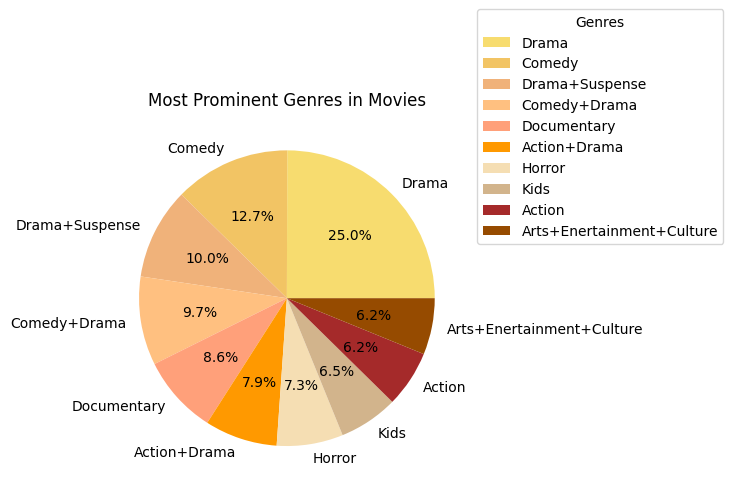

In [140]:
palette_color= ['#F7DC6F', '#F2C464', '#F0B27A', '#FFC080', '#FFA07A', '#FF9900', '#F5DEB3', '#D2B48C', '#A52A2A', '#964B00']
keys=['Drama','Comedy','Drama+Suspense','Comedy+Drama','Documentary','Action+Drama','Horror','Kids','Action','Arts+Enertainment+Culture']
data=[870,442,349,338,300,277,253,226,216,215]
plt.pie(data,labels=keys,colors=palette_color,autopct='%1.1f%%')
legend_labels = keys
plt.legend( legend_labels, loc='upper right', bbox_to_anchor=(1.7, 1.3), title="Genres")
plt.title("Most Prominent Genres in Movies")

Insight Gathered: In the  movies available on Amazon Prime , Drama  and Comedy are the most popular genres

In [50]:
df_tvshows['listed_in'].value_counts().head(10)

,count
listed_in,
TV Shows,263
Animation Kids,176
Drama,116
Documentary Special Interest,114
Kids,108
Comedy,94
Documentary,50
Drama Suspense,50
Special Interest,40


Text(0.5, 1.0, 'Most Prominent Genres in TV Shows')

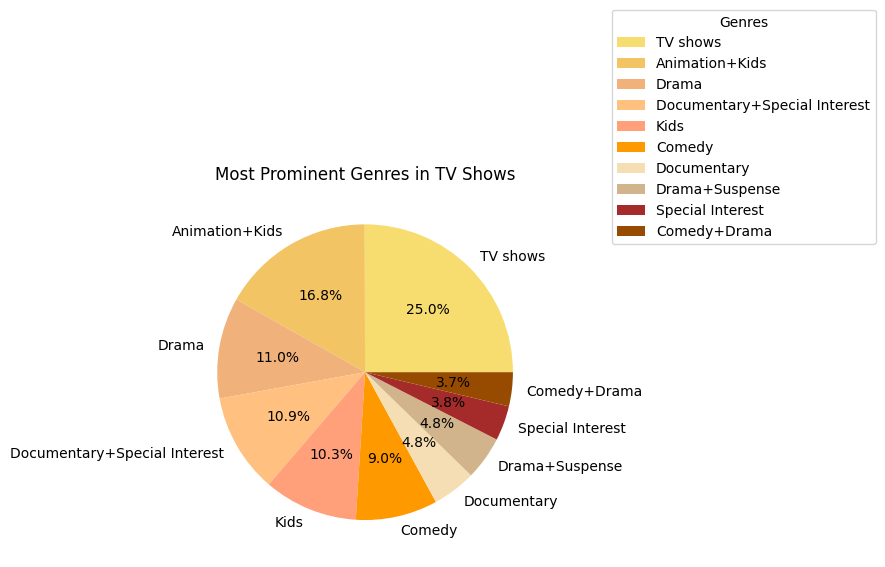

In [141]:
palette_color = ['#F7DC6F', '#F2C464', '#F0B27A', '#FFC080', '#FFA07A', '#FF9900', '#F5DEB3', '#D2B48C', '#A52A2A', '#964B00']
keys=["TV shows","Animation+Kids","Drama","Documentary+Special Interest","Kids","Comedy","Documentary","Drama+Suspense","Special Interest","Comedy+Drama"]
data=[263,176,116,114,108,94,50,50,40,39]
plt.pie(data,labels=keys,colors=palette_color,autopct='%1.1f%%')
legend_labels = keys

plt.legend( legend_labels, loc='upper right', bbox_to_anchor=(1.9, 1.5), title="Genres")
plt.title("Most Prominent Genres in TV Shows")

Insight Gathered: in the TV shows available on Amazon Prime, TV Show genre followed by Animation and Kids are the most popular genres

<ipython-input-142-e518ad23fbb1>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='release_year',data=df_movies,shade=True,color="orange")


<Axes: xlabel='release_year', ylabel='Density'>

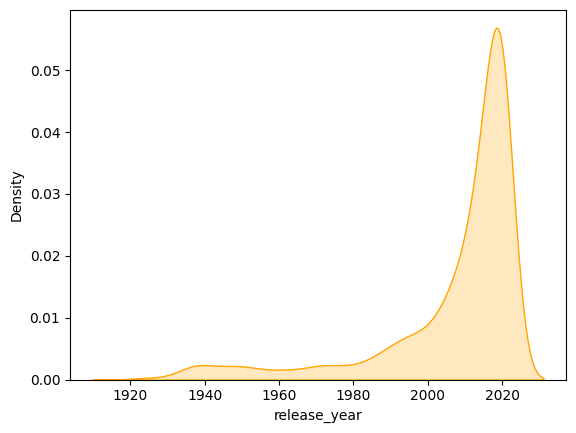

In [142]:
sns.kdeplot(x='release_year',data=df_movies,shade=True,color="orange")

Insight Gathered: Majority of the movies available on Amazon Prime have been released in 2020

<ipython-input-53-6202e9224a45>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='release_year',data=df_tvshows,color="orange",shade=True)


<Axes: xlabel='release_year', ylabel='Density'>

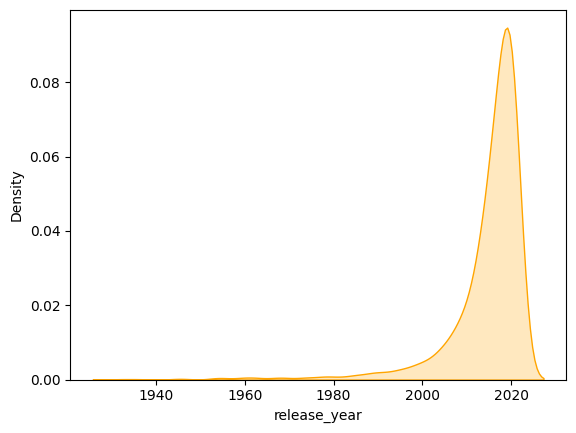

In [53]:
sns.kdeplot(x='release_year',data=df_tvshows,color="orange",shade=True)

Insight Gathered: Majority of the TV shows available on Amazon Prime have released in the range 2018-2020

In [54]:
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
0,Movie,The Grand Seduction,Don McKellar,Brendan Gleeson Taylor Kitsch Gordon Pinsent,Canada,2014,above13,113 min,Comedy Drama,A small fishing village must procure a local d...
1,Movie,Take Care Good Night,Girish Joshi,Mahesh Manjrekar Abhay Mahajan Sachin Khedekar,India,2018,above13,110 min,Drama International,A Metro Family decides to fight a Cyber Crimin...
2,Movie,Secrets of Deception,Josh Webber,Tom Sizemore Lorenzo Lamas Robert LaSardo R...,United States,2017,above13,74 min,Action Drama Suspense,After a man discovers his wife is cheating on ...
3,Movie,Pink Staying True,Sonia Anderson,Interviews with Pink Adele Beyoncé Britney...,United States,2014,above13,69 min,Documentary,Pink breaks the mold once again bringing her ...
4,Movie,Monster Maker,Giles Foster,Harry Dean Stanton Kieran O Brien George Cos...,United Kingdom,1989,above13,45 min,Drama Fantasy,Teenage Matt Banting wants to work with a famo...


In [55]:
df.dtypes

,0
type,object
title,object
director,object
cast,object
country,object
release_year,int64
rating,object
duration,object
listed_in,object
description,object


Extracting the length of a movie from duration column

In [56]:
df_movies[['time','min']]=df_movies['duration'].str.split(" ",expand=True)

<ipython-input-56-7730d33f6066>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies[['time','min']]=df_movies['duration'].str.split(" ",expand=True)
<ipython-input-56-7730d33f6066>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies[['time','min']]=df_movies['duration'].str.split(" ",expand=True)


In [57]:
df_movies.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,time,min
0,Movie,The Grand Seduction,Don McKellar,Brendan Gleeson Taylor Kitsch Gordon Pinsent,Canada,2014,above13,113 min,Comedy Drama,A small fishing village must procure a local d...,113,min
1,Movie,Take Care Good Night,Girish Joshi,Mahesh Manjrekar Abhay Mahajan Sachin Khedekar,India,2018,above13,110 min,Drama International,A Metro Family decides to fight a Cyber Crimin...,110,min
2,Movie,Secrets of Deception,Josh Webber,Tom Sizemore Lorenzo Lamas Robert LaSardo R...,United States,2017,above13,74 min,Action Drama Suspense,After a man discovers his wife is cheating on ...,74,min
3,Movie,Pink Staying True,Sonia Anderson,Interviews with Pink Adele Beyoncé Britney...,United States,2014,above13,69 min,Documentary,Pink breaks the mold once again bringing her ...,69,min
4,Movie,Monster Maker,Giles Foster,Harry Dean Stanton Kieran O Brien George Cos...,United Kingdom,1989,above13,45 min,Drama Fantasy,Teenage Matt Banting wants to work with a famo...,45,min


In [58]:
df_movies=df_movies.astype({'time':'int'})

In [59]:
df_movies=df_movies.drop(['duration','min'],axis=1)

Extracting number of seasons of a TV show from duration

In [60]:
df_tvshows[["seasons","remaining"]]=df_tvshows["duration"].str.split(" ",expand=True)

<ipython-input-60-4c839557d6f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvshows[["seasons","remaining"]]=df_tvshows["duration"].str.split(" ",expand=True)
<ipython-input-60-4c839557d6f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvshows[["seasons","remaining"]]=df_tvshows["duration"].str.split(" ",expand=True)


In [61]:
df_tvshows.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,seasons,remaining
17,TV Show,Zoo Babies,Mark Knight,Narrator Gillian Barlett,United States,2008,None,1 Season,Kids Special Interest,A heart warming and inspiring series that welc...,1,Season
18,TV Show,Zoë Coombs Marr Bossy Bottom,Mark Knight,Zoë Coombs Marr,United States,2020,above18,1 Season,Comedy Talk Show and Variety,Zoë Coombs Marr has been on hiatus Sort of F...,1,Season
20,TV Show,Zoboomafoo,Mark Knight,Maggie Binkley,United States,2001,None,1 Season,Kids,Chris and Martin Kratt bring their enthusiasm ...,1,Season
21,TV Show,Zo Zo Zombie Mini Series,Mark Knight,Alex Cazares Ben Diskin Cristina Vee Erika ...,United States,2020,above7,1 Season,Action Anime Comedy,Zo Zo Zombie is our undead hero who with his ...,1,Season
23,TV Show,ZeroZeroZero,Mark Knight,ANDREA RISEBOROUGH HAROLD TORRES CLAUDIA PIN...,Italy,2020,above18,1 Season,TV Shows,ZeroZeroZero series follows the journey of a c...,1,Season


In [62]:
df_tvshows=df_tvshows.astype({'seasons':'int'})

In [63]:
df_tvshows=df_tvshows.drop(['remaining','duration'],axis=1)

<Axes: xlabel='release_year', ylabel='seasons'>

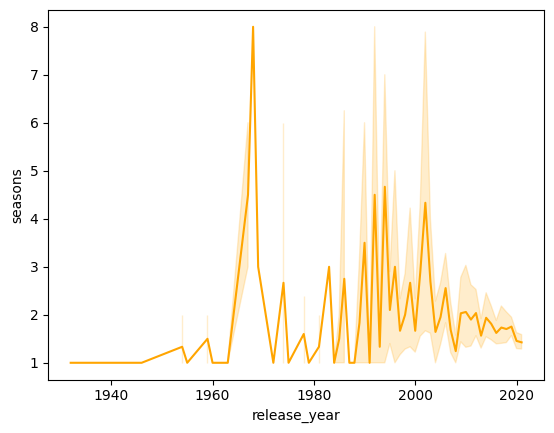

In [143]:
sns.lineplot(y='seasons',x='release_year',data=df_tvshows,color="orange")

Insight Gathered: TV shows on Amazon Prime which were released between 1960 to 1980 have the highest amount of seasons

<Axes: xlabel='release_year', ylabel='time'>

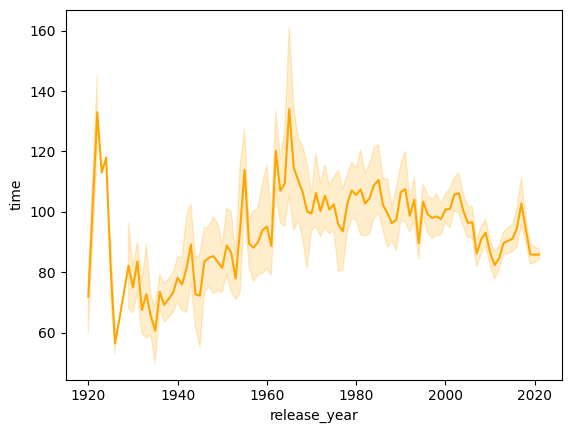

In [144]:
sns.lineplot(y='time',x='release_year',data=df_movies,color="orange")

Insight Gathered: The duration of movies listed on Amazon Prime has stabilized in the recent years ranging from roughly 90 to 110 minutes

<Axes: xlabel='type', ylabel='release_year'>

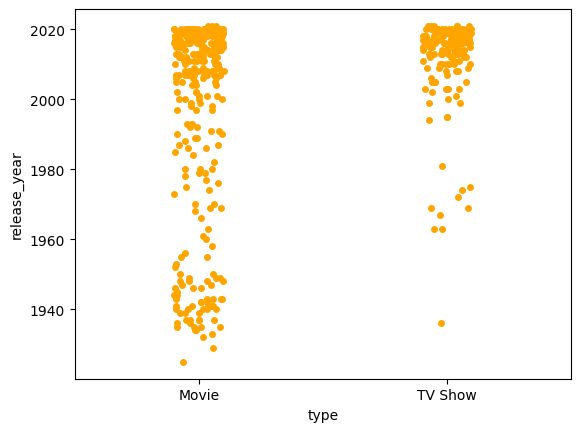

In [145]:
sns.stripplot(x='type',y='release_year',data=df.iloc[500:1000],color="orange")

Insight Gathered: TV shows available on Amazon Prime have mostly been released during 2015 to 2020, similar to the movies available on Amazon Prime

In [67]:
from wordcloud import WordCloud,STOPWORDS

In [68]:
stopwords=set(STOPWORDS)

In [69]:
comment_words=" "

In [70]:
for val in df_movies.description:
  val=str(val)
  tokens=str.split(val)
  for i in range(0,len(tokens)):
    tokens[i]=tokens[i].lower()
  comment_words=comment_words+" ".join(tokens)+" "

In [71]:
wordcloud=WordCloud(stopwords=stopwords,width=1200,height=800,background_color="black",colormap="Set3",collocations=False).generate(comment_words)

(-0.5, 1199.5, 799.5, -0.5)

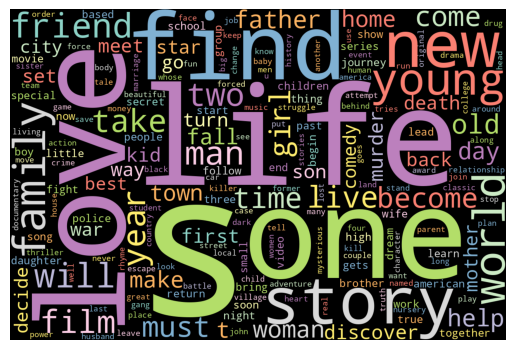

In [72]:
plt.imshow(wordcloud)
plt.axis("off")

Insight Gathered: love,life,young,one ,find  are the most used words for describing Movies available on Amazon Prime

In [73]:
comment_words=" "
for val in df_tvshows.description:
  val=str(val)
  tokens=str.split(val)
  for i in range(0,len(tokens)):
    tokens[i]=tokens[i].lower()
  comment_words=comment_words+" ".join(tokens)+" "

In [74]:
wordcloud=WordCloud(stopwords=stopwords,background_color="black",colormap="Pastel2",width=1500,height=1000,collocations=False).generate(comment_words)

(-0.5, 1499.5, 999.5, -0.5)

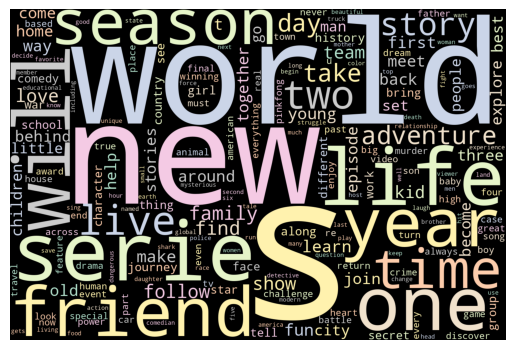

In [75]:
plt.imshow(wordcloud)
plt.axis("off")

Insight Gathered: life,serie,world,new are the most used words in the description of TV shows available on Amazon Prime

In [76]:
comment_words=" "

In [77]:
for val in df_movies.cast:
  val=str(val)
  tokens=str.split(val)
  for i in range(0,len(tokens)):
    tokens[i]=tokens[i].lower()
  comment_words=comment_words+" ".join(tokens)+" "

In [78]:
wordcloud=WordCloud(stopwords=stopwords,background_color="black",colormap="Set3",width=1500,height=1000,collocations=False).generate(comment_words)

(-0.5, 1499.5, 999.5, -0.5)

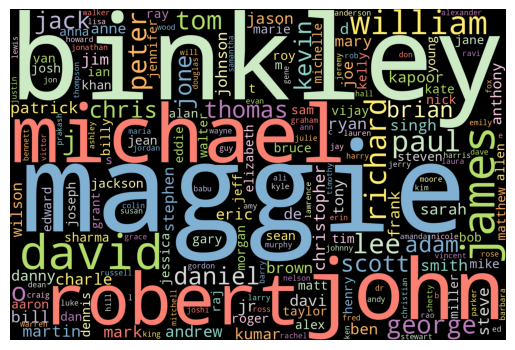

In [79]:
plt.imshow(wordcloud)
plt.axis("off")

Insight Gathered: John,Maggie, Binkley, michael are the most used names in the cast of movies available on Amazon Prime

In [80]:
comment_words=" "

In [81]:
for val in df_tvshows.cast:
  val=str(val)
  tokens=str.split(val)
  for i in range(0,len(tokens)):
    tokens[i]=tokens[i].lower()
  comment_words=comment_words+" ".join(tokens)+" "

In [82]:
wordcloud=WordCloud(stopwords=stopwords,background_color="black",colormap="Set3",width=800,height=800,collocations=False).generate(comment_words)

(-0.5, 799.5, 799.5, -0.5)

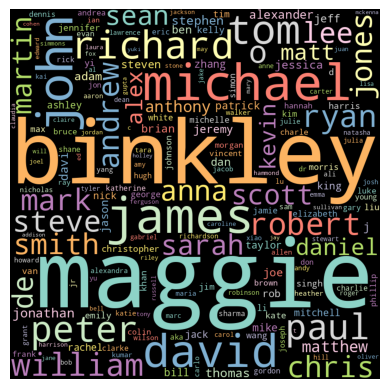

In [83]:
plt.imshow(wordcloud)
plt.axis("off")

Insight Gathered: Maggie, binkley, michael,james and john are the most used names in the cast of TV shows available on Amazon Prime

In [84]:
comment_words=" "


In [85]:
df_movies.listed_in

,listed_in
0,Comedy Drama
1,Drama International
2,Action Drama Suspense
3,Documentary
4,Drama Fantasy
...,...
9660,Comedy
9662,Drama Science Fiction Suspense
9663,Comedy
9665,Action


In [86]:
for val in df_movies.listed_in:
  val=str(val)
  tokens=str.split(val)
  for i in range(0,len(tokens)):
    tokens[i]=tokens[i].lower()

  comment_words=comment_words+" ".join(tokens)+" "

In [87]:
wordcloud=WordCloud(stopwords=stopwords,background_color="black",colormap="Set3",width=1000,height=800,collocations=False).generate(comment_words)

(-0.5, 999.5, 799.5, -0.5)

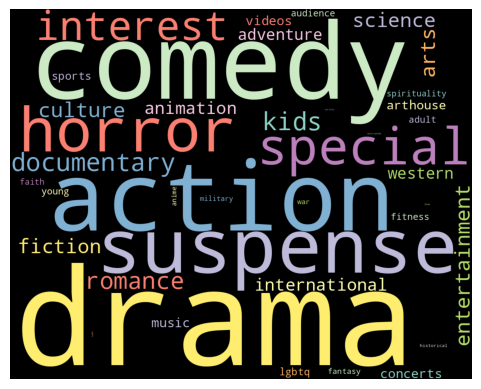

In [88]:
plt.imshow(wordcloud)
plt.axis("off")

Insight Gathered: comedy,suspense,drama and action are the most common genres of the movies available on Amazon Prime

In [89]:
comment_words=" "

In [90]:
for val in df_tvshows.listed_in:
  val=str(val)
  tokens=str.split(val)
  for i in range(0,len(tokens)):
    tokens[i]=tokens[i].lower()

  comment_words=comment_words+" ".join(tokens)+" "

In [91]:
wordcloud=WordCloud(stopwords=stopwords,background_color="black",colormap="Spectral",width=1000,height=800,collocations=False).generate(comment_words)

(-0.5, 999.5, 799.5, -0.5)

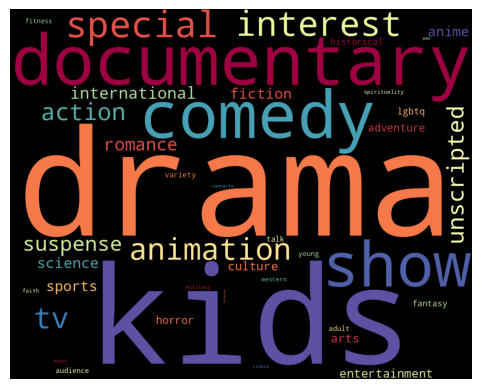

In [92]:
plt.imshow(wordcloud)
plt.axis("off")

Insight Gathered: Kids,drama,comedy and documentary are the most common genres of the TV shows listed on Amazon Prime

In [93]:
comment_words=" "

In [94]:
for val in df_movies.title:
  val=str(val)
  tokens=str.split(val)
  for i in range(0,len(tokens)):
    tokens[i]=tokens[i].lower()

  comment_words=comment_words+" ".join(tokens)+" "

In [95]:
wordcloud=WordCloud(stopwords=stopwords,background_color="black",colormap="Pastel2",width=1000,height=800,collocations=False).generate(comment_words)

(-0.5, 999.5, 799.5, -0.5)

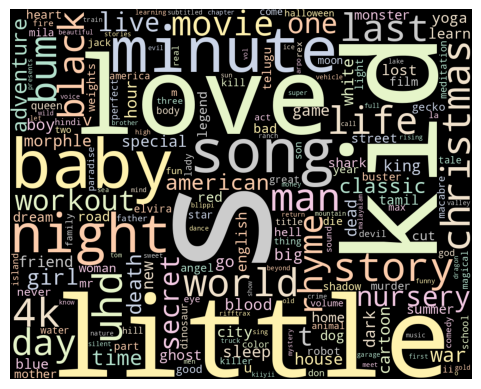

In [96]:
plt.imshow(wordcloud)
plt.axis("off")

Insight Gathered: Love,kid,little are the most used words in the movie titles available on Amazon Prime

In [97]:
comment_words=" "

In [98]:
for val in df_tvshows.title:
  val=str(val)
  tokens=str.split(val)
  for i in range(0,len(tokens)):
    tokens[i]=tokens[i].lower()

  comment_words=comment_words+" ".join(tokens)+" "

In [99]:
wordcloud=WordCloud(stopwords=stopwords,background_color="black",colormap="Set2",width=1000,height=800,collocations=False).generate(comment_words)

(-0.5, 999.5, 799.5, -0.5)

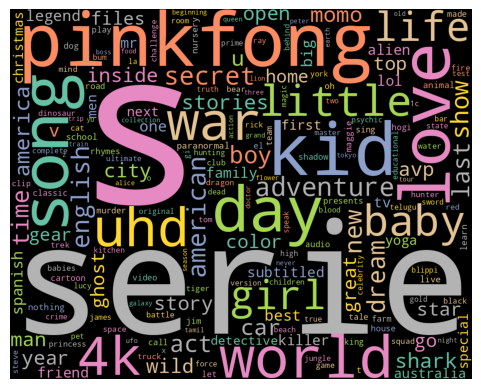

In [100]:
plt.imshow(wordcloud)
plt.axis("off")

Insight Gathered: serie,love,pink are the most commonly used words in the titles of TV shows available on Amazon Prime

In [101]:
df_movies['country'].value_counts().head(10)

,count
country,
United States,7439
India,213
United Kingdom,24
Canada,16
United Kingdom United States,9
United States United Kingdom,6
Italy,6
India United States,5
Canada United States,5


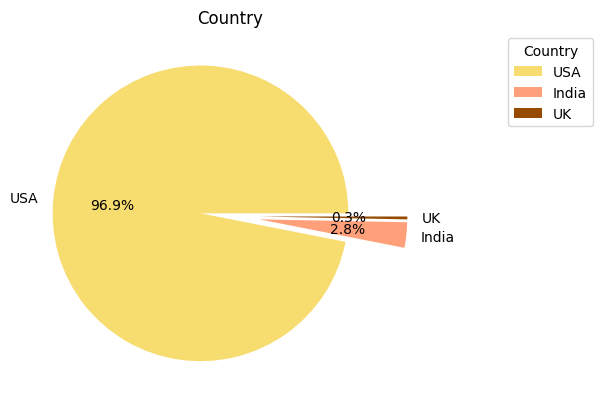

In [147]:
keys=["USA","India","UK"]
data=[7439,213,24]
explode=(0.2,0.2,0.2)
palette_color = ['#F7DC6F', '#FFA07A', '#964B00']
plt.pie(data,labels=keys,explode=explode,colors=palette_color,autopct='%1.1f%%')
legend_labels = keys
plt.title("Country")
plt.legend( legend_labels, loc='upper right', bbox_to_anchor=(1.5, 1), title="Country")

Insight Gathered: Majority of the movies available on Amazon Prime have been made in the USA

In [103]:
df_tvshows['country'].value_counts()

,count
country,
United States,1810
India,16
Spain,5
United Kingdom,4
United Kingdom United States,3
Italy,2
Japan,2
Canada United States,2
Mexico,2


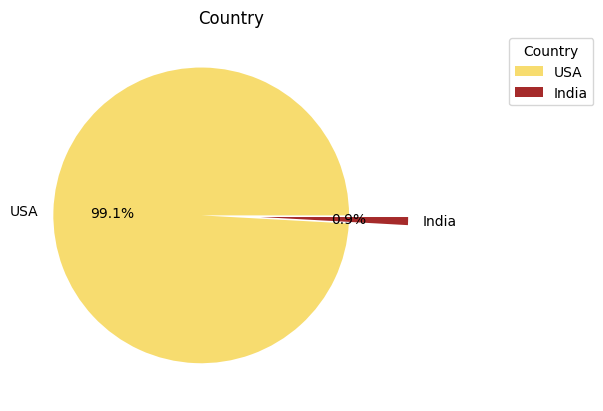

In [150]:
keys=["USA","India"]
data=[1810,16]
explode=(0.2,0.2)
palette_color = ['#F7DC6F',  '#A52A2A']
plt.pie(data,labels=keys,colors=palette_color,explode=explode,autopct='%1.1f%%')
plt.title("Country")
legend_labels = keys

plt.legend( legend_labels, loc='upper right', bbox_to_anchor=(1.5, 1), title="Country")

Insight Gathered: Majority of the TV shows available on Amazon Prime have been made in the USA

In [105]:
df_movies['rating'].value_counts()

,count
rating,
above13,2573
above18,2113
above16,1275
above7,288
parentalguidance,253
forall,130


In [108]:
import seaborn as sns

Text(0.5, 1.0, 'Trend of Age Rating in Movies')

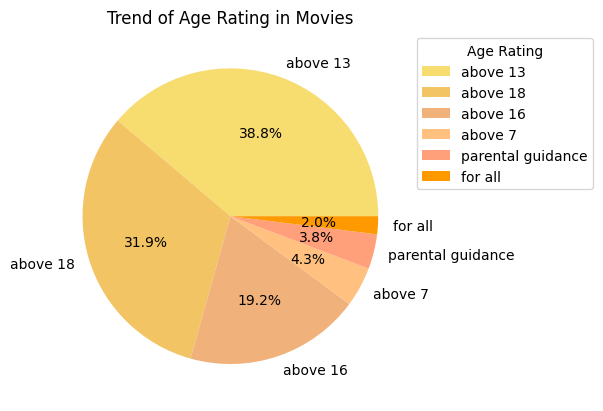

In [152]:
keys=['above 13','above 18','above 16','above 7','parental guidance','for all']
data=[2573,2113,1275,288,253,130]
palette_color = ['#F7DC6F', '#F2C464', '#F0B27A', '#FFC080', '#FFA07A', '#FF9900', '#F5DEB3', '#D2B48C', '#A52A2A', '#964B00']
plt.pie(data,labels=keys,colors=palette_color,autopct='%1.1f%%')
legend_labels = keys

plt.legend( legend_labels, loc='upper right', bbox_to_anchor=(1.5, 1), title="Age Rating")

plt.title("Trend of Age Rating in Movies")


Insight Gathered: Majority of the movies available on Amazon Prime have been listed in either above 13 or above 18 category

In [110]:
df_tvshows.rating.value_counts()

,count
rating,
above16,275
above13,274
above18,223
forall,186
parentalguidance,169
above7,136


Text(0.5, 1.0, 'Trend of Age Rating in TV Shows')

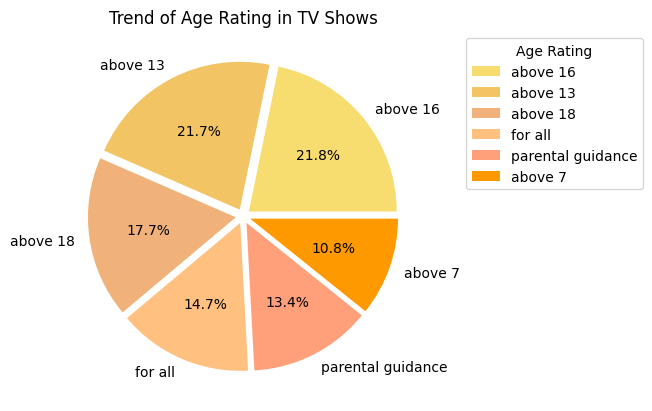

In [153]:
keys=['above 16','above 13','above 18','for all','parental guidance','above 7']
data=[275,274,223,186,169,136]
explode=6*[0.05]
palette_color = ['#F7DC6F', '#F2C464', '#F0B27A', '#FFC080', '#FFA07A', '#FF9900', '#F5DEB3', '#D2B48C', '#A52A2A', '#964B00']
plt.pie(data,labels=keys,explode=explode,colors=palette_color,autopct='%1.1f%%')
legend_labels = keys

plt.legend( legend_labels, loc='upper right', bbox_to_anchor=(1.6, 1), title="Age Rating")
plt.title("Trend of Age Rating in TV Shows")

Insight Gathered:There is approximately an even distribution of age rating for the TV shows available on Amazon Prime